<h1 style="text-align:center"> Personal Key Indicators of Heart Disease</h1>
             



<img src="images.jpg" width="800" height="400">


According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

The goal of this study is to build a predictive model that  it takes patients histories and predcit how likely a new pationt has heart disease. The full description of the dataset is provided in <a href="https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease">Kaggle</a>.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# some helper functions
def plot_contag_table(data_count):
    names = data_count.columns
    for idx, row in data_count.iterrows():
        
        sum_ = row.sum()
        data_count.loc[idx,names[0]] = data_count.loc[idx,names[0]]/ sum_
        data_count.loc[idx,names[1]] = data_count.loc[idx,names[1]]/ sum_
    
    data_count.plot(kind='bar', figsize=(10, 5)) 
    plt.ylabel('Precentage')
    plt.grid()

    
def plot_conf_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data=conf_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])
    sns.heatmap(conf_matrix, annot=True)

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [5]:
print(f'train set shape: {df.shape}')

train set shape: (319795, 18)


show the number of smaples per each class. 

<AxesSubplot:ylabel='HeartDisease'>

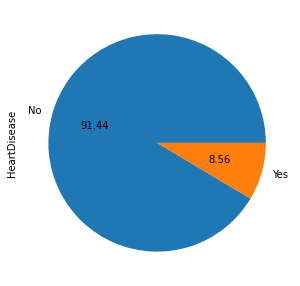

In [6]:
num_classes = df['HeartDisease'].value_counts()
num_classes.plot(kind='pie', autopct='%.2f', figsize=(5, 5))

Obviously the data is imbalanced. This needs to be taken care of!

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Good, no missing value. Most of the featrues are categorical.

### Heart disease versus BMI, PhysicalHealth, MentalHealth and SleepTime

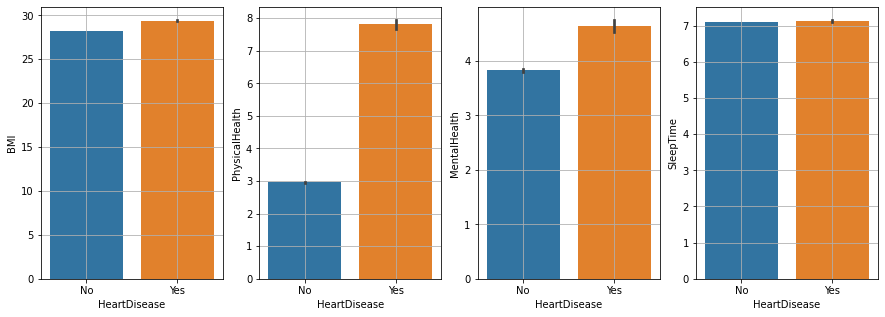

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.barplot(ax=axes[0], x="HeartDisease", y="BMI", data=df)
axes[0].grid()
sns.barplot(ax=axes[1], x="HeartDisease", y="PhysicalHealth", data=df)
axes[1].grid()
sns.barplot(ax=axes[2], x="HeartDisease", y="MentalHealth", data=df)
axes[2].grid()
sns.barplot(ax=axes[3], x="HeartDisease", y="SleepTime", data=df)
axes[3].grid()

 BMI, PhysicalHealth, MentalHealth are important factors for heart disease.  Sleep time has less effect.

### Heart disease versus Smoking

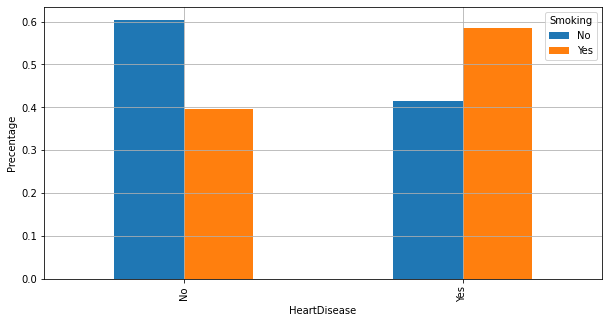

In [38]:
data_count_smoke=df.groupby("HeartDisease")["Smoking"].value_counts().unstack()

plot_contag_table(data_count_smoke)

Smoking can increase the risk of heart disease!

### Heart disease versus Drinking Alcohol 

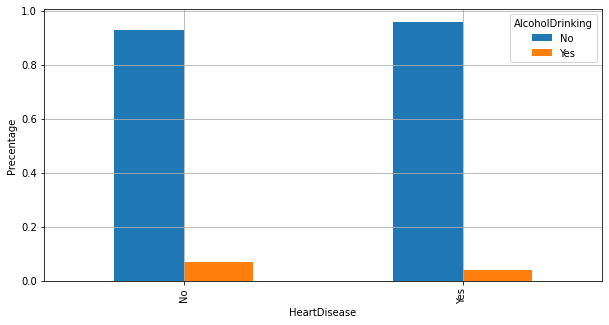

In [42]:
data_count_alcohol=df.groupby("HeartDisease")["AlcoholDrinking"].value_counts().unstack()
plot_contag_table(data_count_alcohol)

Drinking alchohol can decrease the risk of heart disease!!! In fact stuides confrim that moderate dirking alcohol is good for heart attack. <a href="https://www.hopkinsmedicine.org/health/wellness-and-prevention/alcohol-and-heart-health-separating-fact-from-fiction#:~:text=Excessive%20alcohol%20intake%20can%20lead,can%20go%20along%20with%20it.">Please read here.</a>

### Heart Disease versus alcohol Stroke

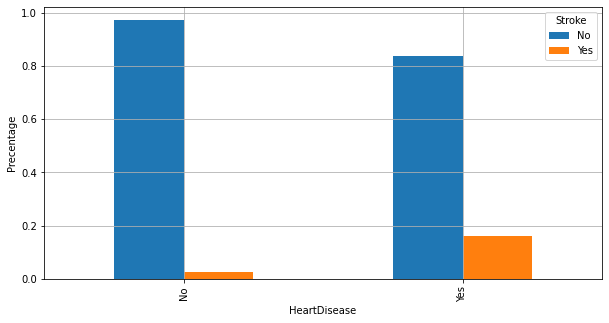

In [44]:
data_count_stroke=df.groupby("HeartDisease")["Stroke"].value_counts().unstack()
plot_contag_table(data_count_stroke)

People who exprerienced stroke are more likley to have heart disease

### Heart Disease versus  Difficulty in Walking

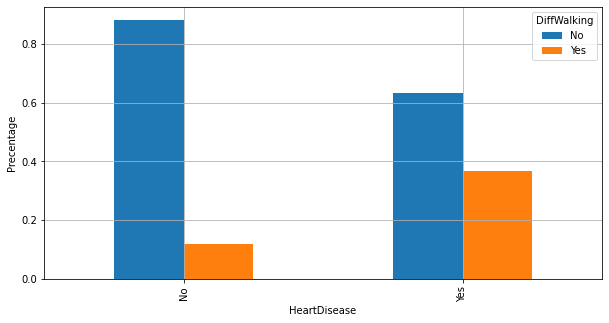

In [49]:
data_count_DiffWalking=df.groupby("HeartDisease")["DiffWalking"].value_counts().unstack()
plot_contag_table(data_count_DiffWalking)

People who reported have diffculty in walking are more likley to have heart disease.

### Heart Disease versus  Sex

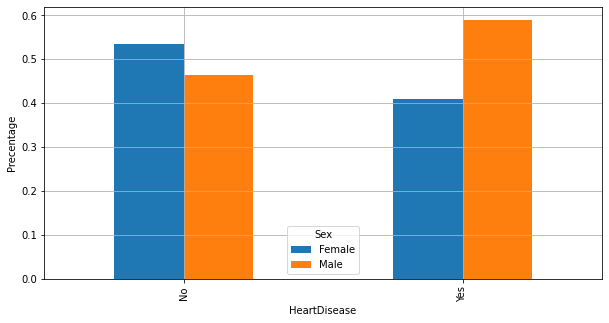

In [52]:
data_count_Sex=df.groupby("HeartDisease")["Sex"].value_counts().unstack()
plot_contag_table(data_count_Sex)

Males are more likley to have heart disease.


### Heart Disease versus  Asthma

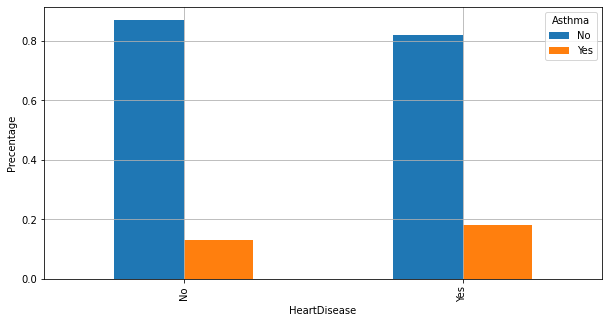

In [54]:
data_count_Sex=df.groupby("HeartDisease")["Asthma"].value_counts().unstack()
plot_contag_table(data_count_Sex)

People who have asthma  are more likley to have heart disease

### Heart Disease versus  Age

<AxesSubplot:xlabel='AgeCategory'>

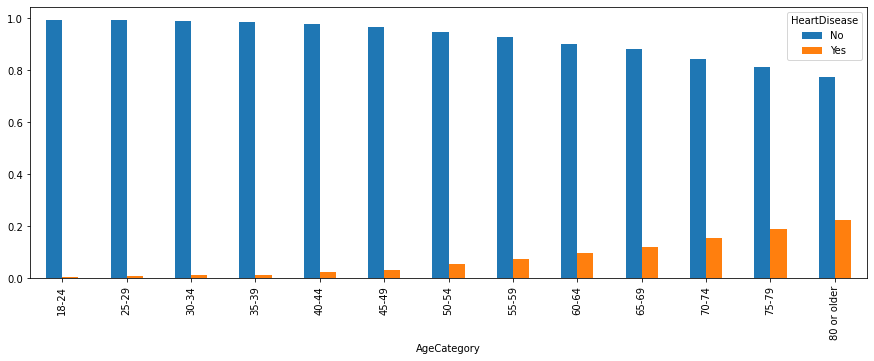

In [15]:
data_count= df.groupby("HeartDisease")["AgeCategory"].value_counts().unstack()
data_count=data_count.T

for idx, row in data_count.iterrows():
    data_count.loc[idx,'No']
    sum_ = row.sum()
    data_count.loc[idx,'No'] = data_count.loc[idx,'No']/ sum_
    data_count.loc[idx,'Yes'] = data_count.loc[idx,'Yes']/ sum_

data_count.plot(kind='bar', figsize=(15, 5))   

Old people are more likely to have heart disease.

### Heart Disease versus  Race

<AxesSubplot:xlabel='Race'>

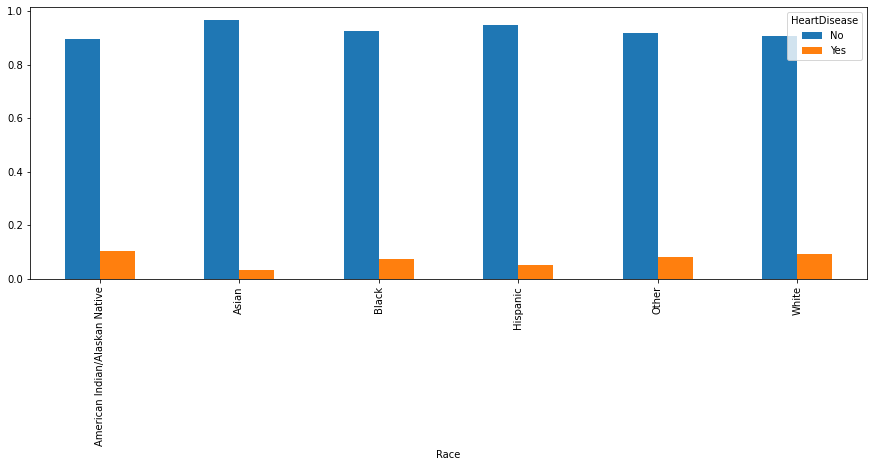

In [53]:
data_count= df.groupby("HeartDisease")["Race"].value_counts().unstack()
data_count=data_count.T

for idx, row in data_count.iterrows():
    data_count.loc[idx,'No']
    sum_ = row.sum()
    data_count.loc[idx,'No'] = data_count.loc[idx,'No']/ sum_
    data_count.loc[idx,'Yes'] = data_count.loc[idx,'Yes']/ sum_
    
    
data_count.plot(kind='bar', figsize=(15, 5))  

Prepare the data for prediction

In [58]:
df['class'] = df['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)
df['class'] = df['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)

In [59]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=44)

## Data preprocessing

In [60]:
features = data_train.columns

feature_num = [feature for i, feature in enumerate(features) if data_train.dtypes[i]=='float64']

feature_cat = [feature for i, feature in enumerate(features) if data_train.dtypes[i]=='object']
del feature_cat[0]

In [61]:
ct = ColumnTransformer([("1hot", OneHotEncoder(), feature_cat),\
                       ("norm", StandardScaler(), feature_num)], remainder='passthrough')

ct.fit(data_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('1hot', OneHotEncoder(),
                                 ['Smoking', 'AlcoholDrinking', 'Stroke',
                                  'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                                  'Diabetic', 'PhysicalActivity', 'GenHealth',
                                  'Asthma', 'KidneyDisease', 'SkinCancer']),
                                ('norm', StandardScaler(),
                                 ['BMI', 'PhysicalHealth', 'MentalHealth',
                                  'SleepTime'])])

In [62]:
x_train_1hot = ct.transform(data_train)[:,:-2]

y_train = data_train['class'].to_numpy()


x_test_1hot =  ct.transform(data_test)[:,:-2]
y_test = data_test['class'].to_numpy()

## Model fitting

In [63]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB

Try SGD classifier

In [67]:
sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(x_train_1hot, y_train)

y_pred = sgd_clf.predict(x_test_1hot)

accuracy_score:0.9148517018715114
f1_score:0.0


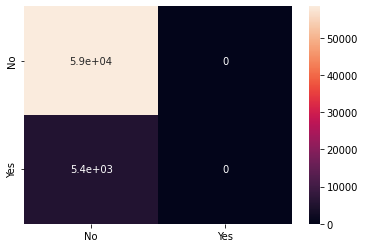

In [68]:
plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')

This is not a good classifier. All the examples are predicted to have not heart disease!!!

Let try to resample the data to incearse the number of positive examples.

In [69]:
# x_trainign_true = x_test_1hot[filt,:].copy()
filt = y_train==True
x_lis = []
x_label = []
for i in range(3):
    x_lis.append(x_train_1hot[filt,:].copy())
    x_label.append(y_train[filt].copy())
    
x_trainign_true =np.concatenate(x_lis)
y_trainign_true =np.concatenate(x_label)

x_train_1hot_resample = np.concatenate([x_trainign_true,x_train_1hot])
y_train_resample = np.concatenate([y_trainign_true,y_train], axis=0)

idx = np.random.permutation(255836)

x_train_1hot_resample = x_train_1hot_resample[idx]
y_train_resample = y_train_resample[idx]

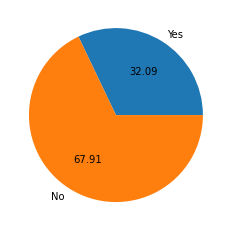

In [70]:
num_classes = y_train_resample.sum()/y_train_resample.shape[0]
labels = ['Yes', 'No']
sizes = [num_classes*100, (1-num_classes)*100]
plt.pie(sizes,labels=labels, autopct='%.2f' )
plt.show()

We train the SGD classifeir again with the new data set

### SGD

In [71]:

parameters = {'penalty':['l1', 'l2', 'elasticnet']}

sgd_clf = GridSearchCV(SGDClassifier(random_state=42), parameters, scoring='f1', cv=3)
sgd_clf.fit(x_train_1hot_resample, y_train_resample)

y_pred = sgd_clf.best_estimator_.predict(x_test_1hot)


accuracy_score:0.8620678872402633
f1_score:0.3897343663530714


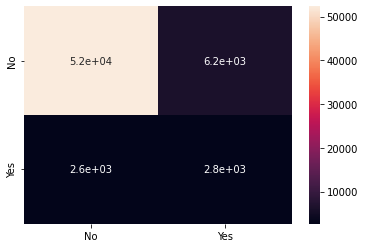

In [72]:
plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')

It is much better!

Now lets try other classifers.

### Naive Bayes

accuracy_score:0.7213214715677231
f1_score:0.319850415935282


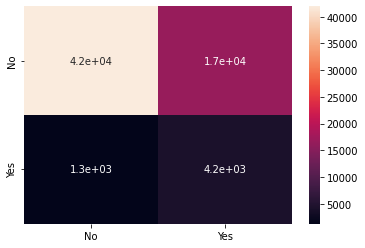

In [73]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train_1hot_resample, y_train_resample)

y_pred = gnb.predict(x_test_1hot)

plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')

Not better than the SGD!

### Random forest

In [74]:
parameters = {'max_depth':[8, 10, 12, 14, 16, 18, 20]}

clf = GridSearchCV(RandomForestClassifier(random_state=42), parameters, scoring='f1', cv=3)
clf = clf.fit(x_train_1hot_resample, y_train_resample)

y_pred = clf.best_estimator_.predict(x_test_1hot)

accuracy_score:0.8752794759142576
f1_score:0.3637233787987556


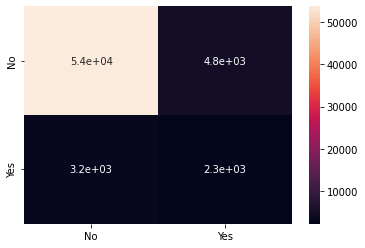

In [75]:
plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')

Accuracy is better than the SGD but f1 score is not.

### Deep  neural network

In [85]:
def build_model(units=32):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units, activation='relu', kernel_regularizer='l2',input_shape=(50,)))
    model.add(tf.keras.layers.Dense(units, activation='relu', kernel_regularizer='l2'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), metrics=['accuracy'])
    return model

In [97]:
y_train_resample=y_train_resample.astype(np.float32)
x_train_1hot_resample=x_train_1hot_resample.astype(np.float32)

model = build_model()
history=model.fit(x=x_train_1hot_resample, y=y_train_resample, epochs=100, batch_size=256)

Epoch 1/100
1000/1000 [==============================] - 2s 957us/step - loss: 1.0421 - accuracy: 0.7239
Epoch 2/100
1000/1000 [==============================] - 1s 919us/step - loss: 0.7014 - accuracy: 0.7632
Epoch 3/100
1000/1000 [==============================] - 1s 891us/step - loss: 0.5737 - accuracy: 0.7717
Epoch 4/100
1000/1000 [==============================] - 1s 893us/step - loss: 0.5266 - accuracy: 0.7734
Epoch 5/100
1000/1000 [==============================] - 1s 884us/step - loss: 0.5082 - accuracy: 0.7743
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4993 - accuracy: 0.7751
Epoch 7/100
1000/1000 [==============================] - 1s 914us/step - loss: 0.4936 - accuracy: 0.7756
Epoch 8/100
1000/1000 [==============================] - 1s 902us/step - loss: 0.4896 - accuracy: 0.7762
Epoch 9/100
1000/1000 [==============================] - 1s 926us/step - loss: 0.4865 - accuracy: 0.7760
Epoch 10/100
1000/1000 [==============================] -

1000/1000 [==============================] - 1s 1ms/step - loss: 0.4622 - accuracy: 0.7792
Epoch 79/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4621 - accuracy: 0.7792
Epoch 80/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4622 - accuracy: 0.7795
Epoch 81/100
1000/1000 [==============================] - 1s 940us/step - loss: 0.4621 - accuracy: 0.7791
Epoch 82/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4620 - accuracy: 0.7794
Epoch 83/100
1000/1000 [==============================] - 1s 970us/step - loss: 0.4619 - accuracy: 0.7797
Epoch 84/100
1000/1000 [==============================] - 1s 957us/step - loss: 0.4619 - accuracy: 0.7795
Epoch 85/100
1000/1000 [==============================] - 1s 984us/step - loss: 0.4617 - accuracy: 0.7796
Epoch 86/100
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4617 - accuracy: 0.7796
Epoch 87/100
1000/1000 [==============================] - 1s 900us/st

Text(0, 0.5, 'accuracy')

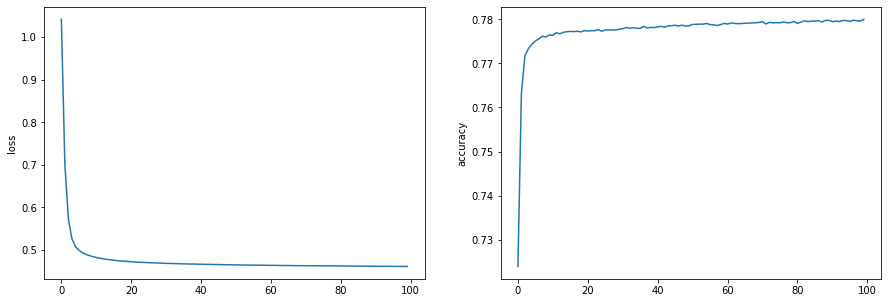

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(history.history['loss'])
axes[0].set_ylabel('loss')
axes[1].plot(history.history['accuracy'])
axes[1].set_ylabel('accuracy')

In [99]:
x_test_1hot = x_test_1hot.astype(np.float32)
y_pred = model.predict(x_test_1hot)
y_pred = y_pred>.5

accuracy_score:0.8544692693756938
f1_score:0.3958198104634559


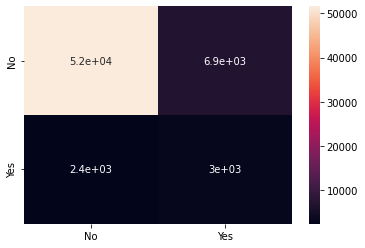

In [100]:
conf_matrix=confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=conf_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])
sns.heatmap(conf_matrix, annot=True)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')

## Defining the best model

Medel |accuracy |f1
-----|-----|----- 
SGD           |0.862|0.389
Naive Bayes   |0.721|0.319
Random forest |0.875|0.363
Neural network|0.854|0.395

Comparing the accuracy  and f1 score values the SGD  and nueral network are close. However,nueral network is the best model for predicting if someone has heart disease.